# The Collatz Lattice

The Collatz Lattice was discovered via the steps:

  1. Creation of the Collatz matrices
  2. Noting that there is a simple generator for the first solution vector element of the solutions of the matrices
  3. Using the simple generator to create the Collatz Lattice
  4. Noting that the path through the Collatz Lattice (up/down at each step) to a given integer correlates with that number's Collatz solution chain

The Collatz Lattice has some interesting properties and can be seen as an inverse of the Collatz chain path:

  - A Collatz Matrix solution that has values: $ 5, 8, 4, 2, 1, 2, 1, 2, 1 $
  - Has a corresponding lattice path: $ 1, \frac{1}{3}, 1, \frac{7}{3}, 5, \frac{13}{9}, 5, \frac{7}{27}, 5 $
  
Note that the matrix solutions add a 2,1 cycle every other generation once an integer is observed as a solution while the lattice solutions produce a given number (once it appears) every other generation.  The up/down pattern through the lattice reflects the {n/2, 3n+1/2} choices of the Collatz chain.

There is a 1:1 correspondence between every integer in the lattice and a Collatz solution.  If a number obeys the Collatz conjecture, then it will be present in the lattice and if an integer is in the lattice, it will obey the Collatz conjecture.  This is by construction.

## Advantages of the Lattice
  1. There are no cycles possible in the lattice
  2. Rational nodes introduce "forms of" that always provide integer solutions later in the lattice with a known periodicity based on the powers of 2 and 3 associated with the lattice point.  So even when a lattice node does not provide us an integer it tells us about future integers that will be solutions.
  
## Disadvantages of the Lattice
  - The numbers get big fast. There are 70 steps in the Collatz chain for 27 and the lattice point for 27 is found to be: $ 27 = \frac{2^{70} - 195820718533800070543}{3^{41}} $
  - The lattice grows exponentially with the size of each generation being $2^N$
  
## 8 mod 18
  - The lattice allows us to find infinitely large 8 mod 18 numbers, by starting with the lattice point of a known 8 mod 18 number


In [1]:
import sys, io
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from fractions import Fraction

pd.set_option('display.max_rows', None)

In [2]:
def tupToFraction(tup):
    p2, p3, c = tup
    fract = Fraction(2**p2 - c, 3**p3)
    return (fract.numerator, fract.denominator)
#
def tupToGennum(generation, tup):
    p2, p3, c = tup
    q3 = generation - p3
    val = (2**p2 - c) * (3**q3)
    return val
#
class LatticeGeneration:
    def descendants(self, tup):
        p2, p3, c = tup
        t1 = (p2 + 1, p3, c)
        t2 = (p2 + 1, p3 + 1, c*3 + 2**p2)
        return t1, t2
    #    
    def __init__(self, previous=None):
        if previous is None:
            self.generation = 0
            self.tups = [(0,0,0)]
        else:
            self.generation = previous.generation + 1
            self.tups = []
            for tup in previous.tups:
                t1, t2 = self.descendants(tup)
                self.tups.append(t1)
                self.tups.append(t2)
     #
    def gennums(self):
        def tupToGN(tup):
            return tupToGennum(self.generation, tup)
        return list(map(tupToGN, self.tups))
    #
    def xvec_for_generation(self):
        XX = np.linspace(0, 1, 2**(self.generation))
        return XX
    #
    def yvec_for_generation(self):
        YY = []
        for i in range((2**(self.generation))):
            g = tupToGennum(self.generation, self.tups[i])
            if g < 0:
                g_6 = -math.log(-g, 6)
            else:
                g_6 = math.log(g, 6)
            YY.append(g_6)
        return YY
    #

        

In [3]:
lg_0 = LatticeGeneration()
lg_1 = LatticeGeneration(lg_0)
lg_2 = LatticeGeneration(lg_1)
lg_3 = LatticeGeneration(lg_2)
lg_4 = LatticeGeneration(lg_3)
lg_5 = LatticeGeneration(lg_4)
lg_1.tups, lg_1.gennums()

([(1, 0, 0), (1, 1, 1)], [6, 1])

In [4]:
lg_2.tups

[(2, 0, 0), (2, 1, 2), (2, 1, 1), (2, 2, 5)]

In [5]:
lg_2.gennums()

[36, 6, 9, -1]

In [6]:
lg_3.tups

[(3, 0, 0),
 (3, 1, 4),
 (3, 1, 2),
 (3, 2, 10),
 (3, 1, 1),
 (3, 2, 7),
 (3, 2, 5),
 (3, 3, 19)]

In [7]:
lg_3.gennums()

[216, 36, 54, -6, 63, 3, 9, -11]

In [8]:
lg_4.tups

[(4, 0, 0),
 (4, 1, 8),
 (4, 1, 4),
 (4, 2, 20),
 (4, 1, 2),
 (4, 2, 14),
 (4, 2, 10),
 (4, 3, 38),
 (4, 1, 1),
 (4, 2, 11),
 (4, 2, 7),
 (4, 3, 29),
 (4, 2, 5),
 (4, 3, 23),
 (4, 3, 19),
 (4, 4, 65)]

In [9]:
lg_4.gennums()

[1296, 216, 324, -36, 378, 18, 54, -66, 405, 45, 81, -39, 99, -21, -9, -49]

In [10]:
lg_5.tups

[(5, 0, 0),
 (5, 1, 16),
 (5, 1, 8),
 (5, 2, 40),
 (5, 1, 4),
 (5, 2, 28),
 (5, 2, 20),
 (5, 3, 76),
 (5, 1, 2),
 (5, 2, 22),
 (5, 2, 14),
 (5, 3, 58),
 (5, 2, 10),
 (5, 3, 46),
 (5, 3, 38),
 (5, 4, 130),
 (5, 1, 1),
 (5, 2, 19),
 (5, 2, 11),
 (5, 3, 49),
 (5, 2, 7),
 (5, 3, 37),
 (5, 3, 29),
 (5, 4, 103),
 (5, 2, 5),
 (5, 3, 31),
 (5, 3, 23),
 (5, 4, 85),
 (5, 3, 19),
 (5, 4, 73),
 (5, 4, 65),
 (5, 5, 211)]

In [11]:
np.array(lg_3.gennums()) * 9

array([1944,  324,  486,  -54,  567,   27,   81,  -99])

In [12]:
lg_5.gennums()

[7776,
 1296,
 1944,
 -216,
 2268,
 108,
 324,
 -396,
 2430,
 270,
 486,
 -234,
 594,
 -126,
 -54,
 -294,
 2511,
 351,
 567,
 -153,
 675,
 -45,
 27,
 -213,
 729,
 9,
 81,
 -159,
 117,
 -123,
 -99,
 -179]

In [13]:
list(map(tupToFraction, lg_3.tups))

[(8, 1), (4, 3), (2, 1), (-2, 9), (7, 3), (1, 9), (1, 3), (-11, 27)]

In [14]:
lg_2.gennums()

[36, 6, 9, -1]

In [15]:
lg_3.xvec_for_generation()

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [16]:
lg_3.yvec_for_generation()

[3.0000000000000004,
 2.0,
 2.2262943855309167,
 -1.0,
 2.3123275180326086,
 0.6131471927654585,
 1.226294385530917,
 -1.3382908331057726]

In [17]:
colors = mpl.colormaps['plasma'](np.linspace(0,1,10))
colors[0]

array([0.050383, 0.029803, 0.527975, 1.      ])

In [18]:
def plotGenerations(N):
    colors = mpl.colormaps['plasma'](np.linspace(0,1,N))
    fig, axes = plt.subplots(2, 1, figsize=(10, 4))  # 2 row, 1 columns
    lg = LatticeGeneration()
    for i in range(N):
        even_odd = i & 1
        lg = LatticeGeneration(lg)
        YY = lg.yvec_for_generation()
        XX = lg.xvec_for_generation()
        axes[even_odd].plot(XX, YY, color=colors[i])
    plt.show()
#

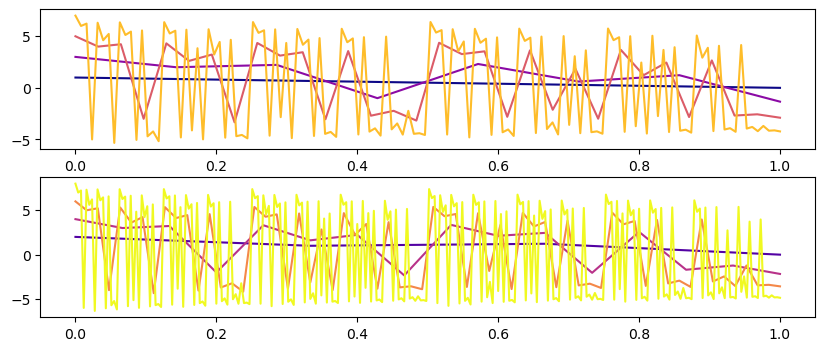

In [19]:
plotGenerations(8)

# _Fractal Nature_ of alternating generations

$\frac{1}{4}$ of values in $generation_{n+2}$ map 1:1 to $generation_{n}$

All other values in $generation_{n+2}$ are functionally related to those preceding values from $generation_{n}$

Most easily seen for generation 1 -> 3


In [20]:
lg_1.gennums()

[6, 1]

In [21]:
lg_3.gennums()

[216, 36, 54, -6, 63, 3, 9, -11]

In [22]:
[ 6 * (6*6),
  1 * (6*6),
  ((6 * 2) - 3) * 6,
  ((1 * 2) - 3) * 6,
  (6*6) * 2 - 9,
  (1*6) * 2 - 9,
  2*(6 * 2 - 3) - 9,
  2*(1 * 2 - 3) - 9
]

[216, 36, 54, -6, 63, 3, 9, -11]

In [23]:
def promoteGennums(generation, gennums):
    GG = []
    n = generation
    for gn in gennums:
        GG.append(36 * gn)
    for gn in gennums:
        # This is the group that repeats across generations
        GG.append((2*gn - (3**n)) * 6)
    for gn in gennums:
        GG.append(2 * (6*gn) - (3**(n+1)))
    for gn in gennums:
        GG.append(2 * (2*gn -(3**n)) - (3**(n+1)))
    return GG

In [24]:
lg_2.gennums()

[36, 6, 9, -1]

In [25]:
lg_4.gennums()

[1296, 216, 324, -36, 378, 18, 54, -66, 405, 45, 81, -39, 99, -21, -9, -49]

In [26]:
promoteGennums(2, lg_2.gennums())

[1296, 216, 324, -36, 378, 18, 54, -66, 405, 45, 81, -39, 99, -21, -9, -49]

# Yay, we know how to promote gennums across generation+2 steps

### So how "space-filling" is this fractal?

We add $2^{n} - 2^{n-2}$ new rationals per generation pair $n$ but the size of the numbers grows at $2^{n}$ ... right?  

The positive integer generation rate is $\lt$ the positive rational generation rate.

The domain grows at $3^n$ because of the ever increasing denominator

So with each generation we have exponentially more to fill in if we need all rationals of form $\frac{a}{3^n}$

The upper sequence gennums have the form:  $6^{n}$

The lower sequence gennums have the form: $2^{n} - 3^{n-1}$

But when the denominator is taken into consideration, we have:

Upper sequence numbers have the form: $2^{n}$

Lower sequernce numbers have the form: $\frac{2^{n} - 3^{n-1}}{3^{n}} \rightarrow -\frac{1}{3}$

While the upper sequence is also the upperbound, the lower sequence is NOT a lower bound on the numbers of a generation.  It is possible to have larger negative numbers in the lattice at a given generation than the lower sequence number.

### So not very "space-filling" -- chain-lengths must grow exponentially long to fill in gaps in smaller numbers as the generations increase

Let's plot the numbers sorted to see that they look like

In [30]:
def gennumFract(generation, gennum):
    denom = 3**generation
    f = Fraction(gennum, denom)
    return (f.numerator, f.denominator)
#

In [31]:
gennumFract(3, 6**3)

(8, 1)

In [60]:
def plotGenerationsSorted(N):
    colors = mpl.colormaps['plasma'](np.linspace(0,1,N))
    fig, axes = plt.subplots(2, 1, figsize=(10, 4))  # 2 row, 1 columns
    lg = LatticeGeneration()
    for i in range(N):
        even_odd = i & 1
        YY = sorted(lg.yvec_for_generation())
        XX = lg.xvec_for_generation()
        axes[even_odd].plot(XX, YY, color=colors[i])
        positive_ints = 0
        positive_ints_lt = 0
        for j in range(len(YY)):
            logy = YY[j]
            if logy > 0:
                Y = sorted(lg.gennums())
                for k in Y[j:]:
                    frac_tup = gennumFract(i, k)
                    if frac_tup[1] == 1:
                        positive_ints = positive_ints + 1
                        if frac_tup[0] < (2**(i-2)):
                            positive_ints_lt = positive_ints_lt + 1
                        negative_residue = 0.75 - (((j-1)+1)/(2**i))
                print((j-1, 2**i, negative_residue, math.log2(1.0 + negative_residue), Y[j-1], Y[j], Y[j-1]/(3**i), positive_ints_lt, positive_ints, len(Y[j:])))
                break
        #
        lg = LatticeGeneration(lg)
    #
    plt.show()
#

In [61]:
gen2_new_val_ratios = [
    2/1,
    4/2,
    5/2,
    8/4,
    10/5,
    14/8,
    18/10,
    26/14,
    36/18,
    50/26,
    67/36,
    89/50,
    117/67,
    157/89,
    208/117,
    277/157,
    367/208,
    488/277,
    649/367
]
gen2_new_val_ratios

[2.0,
 2.0,
 2.5,
 2.0,
 2.0,
 1.75,
 1.8,
 1.8571428571428572,
 2.0,
 1.9230769230769231,
 1.8611111111111112,
 1.78,
 1.7462686567164178,
 1.7640449438202248,
 1.7777777777777777,
 1.7643312101910829,
 1.7644230769230769,
 1.7617328519855595,
 1.768392370572207]

(0, 2, 0.25, 0.32192809488736235, 1, 6, 0.3333333333333333, 0, 1, 1)
(0, 4, 0.5, 0.5849625007211562, -1, 6, -0.1111111111111111, 0, 2, 3)
(1, 8, 0.5, 0.5849625007211562, -6, 3, -0.2222222222222222, 0, 2, 6)
(5, 16, 0.375, 0.45943161863729726, -9, 18, -0.1111111111111111, 1, 4, 10)
(12, 32, 0.34375, 0.42626475470209796, -45, 9, -0.18518518518518517, 2, 5, 19)
(30, 64, 0.265625, 0.33985000288462475, -9, 54, -0.012345679012345678, 4, 8, 33)
(64, 128, 0.2421875, 0.31288295528435534, -54, 81, -0.024691358024691357, 6, 10, 63)
(138, 256, 0.20703125, 0.27146302790437454, -81, 135, -0.012345679012345678, 9, 14, 117)
(287, 512, 0.1875, 0.2479275134435855, -486, 81, -0.024691358024691357, 13, 18, 224)
(597, 1024, 0.166015625, 0.221587121264805, -729, 486, -0.012345679012345678, 20, 26, 426)
(1230, 2048, 0.14892578125, 0.20028560522429753, -891, 243, -0.005029721079103796, 30, 36, 817)
(2517, 4096, 0.13525390625, 0.18301500088275607, -5103, 1458, -0.009602194787379973, 43, 50, 1578)
(5130, 8192, 

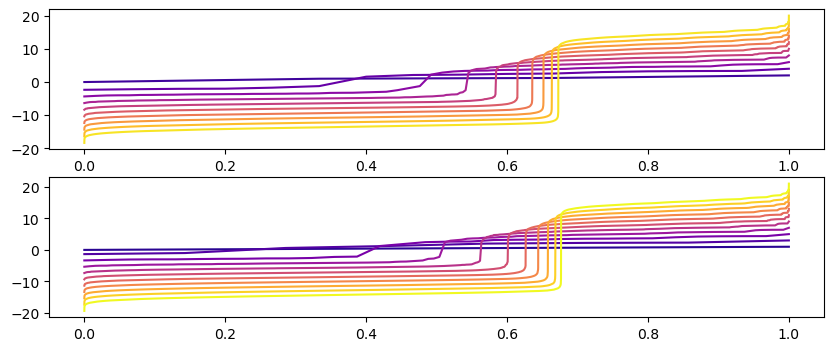

In [62]:
plotGenerationsSorted(22)

# The fraction of numbers that are negative grows with each generation

This is an unexpected finding which hampers positive integer generation ...

The logistic fit for the ratio of the negative numbers looks like it is (where N is the generation}:

${\Large y = \frac{3}{4 + 2^{(\frac{4}{3}N - \frac{49}{6})}}  \rightarrow \frac{3}{4}}$

So for very large numbers only $\frac{1}{4}$th of the rational numbers in the lattice are positive.

# While the number of integers increases with each generation, the fraction of integers shrinks rapidly

But seems to also have an assymptote where each 2nd generation has ~3 new integers for every 4 integers brought forward from generation-2.  The fit over 10+ generations is very tight for this 3:4 ratio of new integers to promoted integers.

But the fraction of new numbers at generation n that are less than $2^{n-2}$ increases with each generation with $638\ of\ 649\ new\ Collatz\ Numbers\ less\ than\ 2^{n-2}$ by generation 22

So the "Collatz Numbers" have some similarity to Primes -- given just a generation number we can't compute all of the Collatz numbers for that generation, but the number of Collatz numbers we are going to find becomes more and more definitive.


In [64]:
def collatzChain_l(i):
    chain = []
    while i != 1:
        chain.append(i)
        if (i & 1) == 0:
            i = i//2
        else:
            i = (3*i + 1)//2
    #
    chain.append(i)
    return (len(chain), chain)
#

In [83]:
lg_0 = LatticeGeneration()
lg_1 = LatticeGeneration(lg_0)
[ lg_0.tups, lg_1.tups]

[[(0, 0, 0)], [(1, 0, 0), (1, 1, 1)]]

In [ ]:
def tupChain(collatzNumber):
    reverseLatticePath = [] 
    while i != 1:
        if (i & 1) == 0:
            reverseLatticePath.append(0)
            i = i//2
        else:
            reverseLatticePath.append(1)
            i = (3*i + 1)//2
    #
    reverseLatticePath.append(1)
    latticePath = reverseLatticePath[::-1]
    L = len(latticePath)
    
    j = 0
    
    if L & 1 == 0:
        # even chains start from generation 1
        chain = [tupToGennum(1 (1, 1, 1))]
        j = 1
    else:
        # odd chains start from generation 0
        chain = [tupToGennum(0, (0, 0, 0))]

    while j < ((L - 2):
        pair = latticePath[j:j+2]
        if pair == [0,0]
            chain.append()
    

In [78]:
def collatzLatticePathString(i):
    reverseLatticePath = []
    up = 0
    dn = 0
    while i != 1:
        if (i & 1) == 0:
            reverseLatticePath.append("↘")
            dn = dn + 1
            i = i//2
        else:
            reverseLatticePath.append("⇗")
            up = up + 1
            i = (3*i + 1)//2
    #
    reverseLatticePath.latticePath("⇰")
    dn = dn + 1
    return (dn, up, "".join(reverseLatticePath[::-1]))
#

In [81]:
collatzLatticePathString(26)

(7, 2, '⇰↘↘↘⇗↘↘⇗↘')

In [79]:
collatzLatticePathString(27)


(30,
 41,
 '⇰↘↘↘⇗↘↘↘↘⇗⇗⇗↘↘⇗↘↘↘⇗↘⇗↘⇗↘↘↘⇗⇗⇗⇗↘↘⇗⇗⇗⇗⇗⇗↘⇗⇗↘⇗⇗⇗↘↘⇗↘⇗⇗⇗⇗↘⇗⇗⇗↘⇗⇗↘⇗↘⇗⇗⇗⇗⇗↘⇗⇗')

In [80]:
collatzLatticePathString(28)

(9, 5, '⇰↘↘↘⇗↘↘⇗↘⇗⇗⇗↘↘')

In [84]:
collatzChain_l(26)

(9, [26, 13, 20, 10, 5, 8, 4, 2, 1])

In [70]:
# 27 is the first really long chain we run into in the early Collatz Numbers
collatzChain_l(27)

(71,
 [27,
  41,
  62,
  31,
  47,
  71,
  107,
  161,
  242,
  121,
  182,
  91,
  137,
  206,
  103,
  155,
  233,
  350,
  175,
  263,
  395,
  593,
  890,
  445,
  668,
  334,
  167,
  251,
  377,
  566,
  283,
  425,
  638,
  319,
  479,
  719,
  1079,
  1619,
  2429,
  3644,
  1822,
  911,
  1367,
  2051,
  3077,
  4616,
  2308,
  1154,
  577,
  866,
  433,
  650,
  325,
  488,
  244,
  122,
  61,
  92,
  46,
  23,
  35,
  53,
  80,
  40,
  20,
  10,
  5,
  8,
  4,
  2,
  1])

In [85]:
collatzChain_l(31)

(68,
 [31,
  47,
  71,
  107,
  161,
  242,
  121,
  182,
  91,
  137,
  206,
  103,
  155,
  233,
  350,
  175,
  263,
  395,
  593,
  890,
  445,
  668,
  334,
  167,
  251,
  377,
  566,
  283,
  425,
  638,
  319,
  479,
  719,
  1079,
  1619,
  2429,
  3644,
  1822,
  911,
  1367,
  2051,
  3077,
  4616,
  2308,
  1154,
  577,
  866,
  433,
  650,
  325,
  488,
  244,
  122,
  61,
  92,
  46,
  23,
  35,
  53,
  80,
  40,
  20,
  10,
  5,
  8,
  4,
  2,
  1])

In [69]:
math.log2(4616)

12.172427508645482

$ 2^{4} < 27 < 2^{5} $

$ 2^{12} < 4616 < 2^{13} $

# Can one show there is an upper bound on m:
For a Collatz number with the bounds: 
$2^{n-1} < C < 2^{n}$

There is an m such that the Collatz Chain length for C is always

$L_{C} < mn$

... we know m is definitly greater than or equal three from $C = 27$.

# What do the counts of the numbers generated below $2^{13}$ look like?


In [ ]:
# Generation, New Rational Count, New Integer count, Integer count below 32
[ [0, 1, 1, 1],
 [1, 2, 1, 2],
 [2, 3, 1, 3],
 [3, 8 - 2=6, 1, 4],
 # 4 is first time we get a number other than a power of 2 ... [5,16]
 [4, 16 - 3 - 1 = 12, 2, 6],
 [5, 32 - 6 - 2 = 24, 2, 8],  # 1/4 of numbers below 32 by generation 5
 [6, 64 - 12 - 1 - 1 = 50, "???", 11]
]
# Need to write code to go further ...
 

In [65]:
collatzChain_l(63)

(69,
 [63,
  95,
  143,
  215,
  323,
  485,
  728,
  364,
  182,
  91,
  137,
  206,
  103,
  155,
  233,
  350,
  175,
  263,
  395,
  593,
  890,
  445,
  668,
  334,
  167,
  251,
  377,
  566,
  283,
  425,
  638,
  319,
  479,
  719,
  1079,
  1619,
  2429,
  3644,
  1822,
  911,
  1367,
  2051,
  3077,
  4616,
  2308,
  1154,
  577,
  866,
  433,
  650,
  325,
  488,
  244,
  122,
  61,
  92,
  46,
  23,
  35,
  53,
  80,
  40,
  20,
  10,
  5,
  8,
  4,
  2,
  1])

In [66]:
collatzChain_l(62)

(69,
 [62,
  31,
  47,
  71,
  107,
  161,
  242,
  121,
  182,
  91,
  137,
  206,
  103,
  155,
  233,
  350,
  175,
  263,
  395,
  593,
  890,
  445,
  668,
  334,
  167,
  251,
  377,
  566,
  283,
  425,
  638,
  319,
  479,
  719,
  1079,
  1619,
  2429,
  3644,
  1822,
  911,
  1367,
  2051,
  3077,
  4616,
  2308,
  1154,
  577,
  866,
  433,
  650,
  325,
  488,
  244,
  122,
  61,
  92,
  46,
  23,
  35,
  53,
  80,
  40,
  20,
  10,
  5,
  8,
  4,
  2,
  1])

In [48]:
def negative_fraction(n):
    return 3.0 / (4 + (2**((4.0*n/3)-(49.0/6))))
#
def int_fraction_of_positive(n):
    return (2**(0.585*i))
for i in range(22):
    print (negative_fraction(i), int_fraction_of_positive(i))

0.7493480534958005 1.0
0.7483593652617127 1.5000389892858181
0.7458795586416878 2.250116969377619
0.7397031162797185 3.375263184520071
0.7245838176218848 5.063026375881119
0.6890922726437908 7.5947369676041525
0.6133842005096123 11.392401564776572
0.48039014623481496 17.08904652876562
0.3106601717798213 25.6342360828679
0.16434412364458106 38.45235358485922
0.07515258690799846 57.68002960709312
0.03174278424359518 86.52229331380003
0.012927130052416136 129.7868134131237
0.005184028083056688 194.68528041484913
0.0020658956136417202 292.03551126231633
0.0008212155790147509 438.0646531494919
0.00032611499178569655 657.1140595522066
0.00012945277074166876 985.6967097361936
5.1378714939844876e-05 1478.5834962150354
2.0390499045892128e-05 2217.9328932370913
8.092107603542328e-06 3326.985815475139
3.21137592920084e-06 4990.608440013584


# Proofish
Every generation will produce a growing number of new Collatz Numbers

The largest number of any generation is $2^{n}$ 

By generation $2^{8n}$ we will have produced enough integers that the odds are that all gaps are filled below $2^{n}$ ${\Large ?}$

What is the smallest that I can make that number?

The the new Collatz numbers generated with each generation have a distribution from $1 \ to \ 2^{n}$


In [12]:
df[(df["numer"]==20) & (df["denom"]==1)]

,gen,N,M,c,numer,denom,mod
67,6,6,1,4,20,1,1
323,8,8,2,76,20,1,4
1347,10,10,3,484,20,1,25


In [13]:
df[(df["gen"]==10) & (df["N"]==10) & (df["denom"]==1)]

,gen,N,M,c,numer,denom,mod
1023,10,10,0,0,1024,1,0
1024,10,10,1,1,341,1,1
1027,10,10,1,4,340,1,1
1028,10,10,2,7,113,1,7
1039,10,10,1,16,336,1,1
1087,10,10,1,64,320,1,1
1089,10,10,2,70,106,1,7
1090,10,10,3,79,35,1,25
1095,10,10,2,88,104,1,7
1097,10,10,3,106,34,1,25


In [14]:
df[(df["numer"]==21) & (df["denom"]==1)]

,gen,N,M,c,numer,denom,mod
64,6,6,1,1,21,1,1
320,8,8,2,67,21,1,4
1344,10,10,3,457,21,1,25


# 20 and 21
Both start in Generation 6 and follow a similar pattern through succeeding generations

# First seen solutions
Every integer, once observed is then present in all future gen+2 generations

Working our way to the right pandas syntax for filtering the data frame down to just the "first seen rows"

First we filter down to the integers:


In [15]:
df[ (df["denom"]==1) ].head()

,gen,N,M,c,numer,denom,mod
0,0,0,0,0,1,1,0
1,1,1,0,0,2,1,0
3,2,2,0,0,4,1,0
4,2,2,1,1,1,1,1
7,3,3,0,0,8,1,0


In [16]:
df[ (df["denom"]==1) ].groupby(["numer"]).idxmin().head()

,gen,N,M,c,denom,mod
numer,,,,,,
1,0,0,0,0,0,0
2,1,1,1,1,1,1
3,34,34,34,34,34,34
4,3,3,3,3,3,3
5,16,16,16,16,16,16


In [17]:
df[ (df["denom"]==1) ].groupby(["numer"]).idxmin()["gen"].head()

numer
1     0
2     1
3    34
4     3
5    16
Name: gen, dtype: int64

In [18]:
df.loc[df[ (df["denom"]==1) ].groupby(["numer"]).idxmin()["gen"]]

,gen,N,M,c,numer,denom,mod
0,0,0,0,0,1,1,0
1,1,1,0,0,2,1,0
34,5,5,2,5,3,1,5
3,2,2,0,0,4,1,0
16,4,4,1,1,5,1,1
69,6,6,2,10,6,1,1
7,3,3,0,0,8,1,0
33,5,5,1,2,10,1,2
1098,10,10,4,133,11,1,52
139,7,7,2,20,12,1,2


In [19]:
df = pd.DataFrame(list(generations(20)), columns=["gen", "N", "M", "c", "numer", "denom", "mod"])

In [20]:
df.loc[df[ (df["denom"]==1) ].groupby(["numer"]).idxmin()["gen"]]

,gen,N,M,c,numer,denom,mod
0,0,0,0,0,1,1,0
1,1,1,0,0,2,1,0
34,5,5,2,5,3,1,5
3,2,2,0,0,4,1,0
16,4,4,1,1,5,1,1
69,6,6,2,10,6,1,1
2198,11,11,5,347,7,1,104
7,3,3,0,0,8,1,0
8796,13,13,6,1631,9,1,173
33,5,5,1,2,10,1,2


In [21]:
df[df["denom"]==1]

,gen,N,M,c,numer,denom,mod
0,0,0,0,0,1,1,0
1,1,1,0,0,2,1,0
3,2,2,0,0,4,1,0
4,2,2,1,1,1,1,1
7,3,3,0,0,8,1,0
9,3,3,1,2,2,1,2
15,4,4,0,0,16,1,0
16,4,4,1,1,5,1,1
19,4,4,1,4,4,1,1
20,4,4,2,7,1,1,7


In [22]:
9 * 2**10

9216

In [23]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    if b < 10:
        return "".join(map(str, digits[::-1]))
    else:
        return digits[::-1]

In [24]:
numberToBase(9, 3)

'100'

In [25]:
numberToBase(28, 3), numberToBase(29, 3), numberToBase(30, 3)

('1001', '1002', '1010')

In [26]:
def collatzNext(n):
    if n == 1:
        return 1
    elif n %2 == 0:
        return n//2
    return (3*n + 1)//2

def collatzSeq(i):
    L = []
    L.append(i)
    while i != 1:
        i = collatzNext(i)
        L.append(i)
    return L



# Finding the Matrix Generator Tuple for a given integer J is easy

##  -- the "lattice" from (0,0,0) is the reversed operation set of the collatz sequence from 1 to J 

For instance the number 5:

It's Collatz sequence is:
  - 5,8,4,2,1
  - Which when generating forward we were rendering:  □□□■  (even, even, even, odd)

It's matrix is:

$$
\begin{bmatrix} 
    -3 & 2 & 0 & 0 & 0 & 0 & 0\\
    0 & -1 & 2 & 0 & 0 & 0 & 0\\
    0 & 0 & -1 & 2 & 0 & 0 & 0\\
    0 & 0 & 0 & -1 & 2 & 0 & 0\\
    0 & 0 & 0 & 0 & \textbf{-3} & \textbf{2} & \textbf{0}\\ 
    0 & 0 & 0 & 0 & \textbf{0} & \textbf{-1} & \textbf{2}\\
    0 & 0 & 0 & 0 & \textbf{-1} & \textbf{0} & \textbf{1} 
\end{bmatrix}
X
=
\begin{bmatrix} 
    1 \\
    0 \\
    0 \\
    0 \\
    \textbf{1} \\ 
    \textbf{0} \\ 
    \textbf{0} 
\end{bmatrix}
$$

$$\implies$$

$$
X
=
\begin{bmatrix} 
    5 \\
    8 \\
    4 \\
    2 \\
    \textbf{1} \\ 
    \textbf{2} \\ 
    \textbf{1}
\end{bmatrix}
$$

It's tuple sequence is:

  - $ (4,1,1) = 5 $
  - $ (3,1,1) = \frac{7}{3} $
  - $ (2,1,1) = 1 $
  - $ (1,1,1) = \frac{1}{3} $
  - $ (0,0,0) = 1 $
  
Which looks like: ■□□□  (down, up, up, up) when moving left to right through tuple lattice starting at (0,0,0)



In [27]:
# Find the collatz triplet tuple for the given number
#

def collatzTup(i):
    steps = []
    
    j = i
    while j != 1:
        if j % 2 == 0:
            steps.append(0)
            j = j//2
        else:
            steps.append(1)
            j = (3*j + 1)//2
    
    sc_tup = (0,0,0)
    for step in steps:
        p2, p3, c = sc_tup
        fract = Fraction(2**p2 - c, 3**p3)
        #print(sc_tup, fract.numerator, "/", fract.denominator)
        if step == 0:
            sc_tup = (p2 + 1, p3, c)
        else:
            sc_tup = (p2 + 1, p3 + 1, c*3 + 2**p2)
            
    p2, p3, c = sc_tup
    fract = Fraction(2**p2 - c, 3**p3)
    #print(sc_tup, fract.numerator, "/", fract.denominator)
    return sc_tup

def collatzTupLatex(i):
    steps = []
    
    print("$")
    print("\\begin{matrix}")
    
    j = i
    while j != 1:
        if j % 2 == 0:
            steps.append(0)
            j = j//2
        else:
            steps.append(1)
            j = (3*j + 1)//2
    
    sc_tup = (0,0,0)
    for step in steps:
        p2, p3, c = sc_tup
        fract = Fraction(2**p2 - c, 3**p3)
        if fract.denominator == 1:
            print("%s & %d \\\\"%(str(sc_tup), fract.numerator))
        else:
            print("%s & \\frac{%d}{%d} \\\\"%(str(sc_tup), fract.numerator, fract.denominator))
        if step == 0:
            sc_tup = (p2 + 1, p3, c)
        else:
            sc_tup = (p2 + 1, p3 + 1, c*3 + 2**p2)
            
    p2, p3, c = sc_tup
    fract = Fraction(2**p2 - c, 3**p3)
    if fract.denominator == 1:
        print("%s & %d \\\\"%(str(sc_tup), fract.numerator))
    else:
        print("%s & \\frac{%d}{%d} \\\\"%(str(sc_tup), fract.numerator, fract.denominator))
    print("\\end{matrix}")
    print("$")
    return sc_tup


In [28]:
def get_lattice_path(i):
    steps = []
    
    # Collatz lattice tuple and equivalent fraction as numerator, denominator pair
    tups = ((0,0,0), (1,1))
    steps.append(tups)
    
    j = i
    while j != 1:
        p2, p3, c = tups[0]
        if j % 2 == 0:
            # up
            j = j//2
            p2, p3, c = p2 + 1, p3, c
        else:
            # down
            j = (3*j + 1)//2
            p2, p3, c = p2 + 1, p3 + 1, c*3 + 2**p2
        fract = Fraction(2**p2 - c, 3**p3)
        tups = ((p2, p3, c), (fract.numerator, fract.denominator))
        steps.append( tups )
    
    return steps


In [29]:
get_lattice_path(5)

[((0, 0, 0), (1, 1)),
 ((1, 1, 1), (1, 3)),
 ((2, 1, 1), (1, 1)),
 ((3, 1, 1), (7, 3)),
 ((4, 1, 1), (5, 1))]

In [30]:
collatzTup(5)

(4, 1, 1)

In [31]:
sct_with_fraction((6,2,19))

[6, 2, 19, 5, 1]

In [32]:
collatzTup(27)

(70, 41, 195820718533800070543)

In [33]:
len(numberToBase(195820718533800070543, 2))

68

In [34]:
collatzTup(5)

(4, 1, 1)

In [84]:
next_gen_tup((4,1,1))

[((4, 1, 1), (5, 1)), ((5, 2, 19), (13, 9)), ((6, 2, 19), (5, 1))]

In [85]:
sct_with_fraction((5,2,19))

[5, 2, 19, 13, 9]

In [86]:
next_gen_tup((6, 2, 19))

[((6, 2, 19), (5, 1)), ((7, 3, 121), (7, 27)), ((8, 3, 121), (5, 1))]

In [87]:
next_gen_tup((8, 3, 121))

[((8, 3, 121), (5, 1)), ((9, 4, 619), (-107, 81)), ((10, 4, 619), (5, 1))]

In [88]:
next_gen_tup((10, 4, 619))

[((10, 4, 619), (5, 1)), ((11, 5, 2881), (-833, 243)), ((12, 5, 2881), (5, 1))]

In [90]:
next_gen_tup((12, 5, 2881))

[((12, 5, 2881), (5, 1)),
 ((13, 6, 12739), (-4547, 729)),
 ((14, 6, 12739), (5, 1))]

In [89]:
next_gen_tup((12, 5, 2881))

[((12, 5, 2881), (5, 1)),
 ((13, 6, 12739), (-4547, 729)),
 ((14, 6, 12739), (5, 1))]

In [79]:
sct_with_fraction((7, 3, 121))

[7, 3, 121, 7, 27]

In [38]:
collatzTup(54)

(71, 41, 391641437067600141086)

In [39]:
len(numberToBase(391641437067600141086, 2))

69

In [40]:
collatzTup(3)

(5, 2, 5)

In [41]:
collatzTup(3*5)

(12, 5, 451)

In [42]:
collatzTup(27*5)

(28, 13, 53201851)

In [43]:
collatzTup(81)

(16, 6, 6487)

In [83]:
# Given a tuple in gen n for a number, what is its tuple in gen n+2 ?
def next_gen_tup(sc_tup):
    L = []
    p2, p3, c = sc_tup
    fract = Fraction(2**p2 - c, 3**p3)
    L.append(((p2, p3, c),(fract.numerator,fract.denominator)))
    
    p2_ = p2 + 1
    p3_ = p3 + 1
    c_ =  3*c + 2**p2
    fract = Fraction(2**p2_ - c_, 3**p3_)
    L.append(((p2_, p3_, c_),(fract.numerator,fract.denominator)))
    
    p2_ = p2_ + 1
    fract = Fraction((2**p2_) - c_, 3**p3_)
    L.append(((p2_, p3_, c_),(fract.numerator,fract.denominator)))
    
    return L
#

def prev_gen_tup(sc_tup):
    p2, p3, c = sc_tup
    fract = Fraction(2**p2 - c, 3**p3)
    print(sc_tup, fract.numerator, "/", fract.denominator)
    
    p2_ = p2 - 2
    p3_ = p3 - 1
    c_ = 2**(p2_) - (((3**p3_)*(2**p2 - c))//3**p3)
    
    fract = Fraction(2**p2_ - c_, 3**p3_)
    r = (p2_, p3_, c_ )
    print(r, fract.numerator, "/", fract.denominator)
    
    return r


In [45]:
next_gen_tup((4,1,1))

(4, 1, 1) 5 / 1
(6, 2, 19) 5 / 1


(6, 2, 19)

In [46]:
next_gen_tup((70, 41, 195820718533800070543))

(70, 41, 195820718533800070543) 27 / 1
(72, 42, 1768053776318811515053) 27 / 1


(72, 42, 1768053776318811515053)

In [47]:
numberToBase(195820718533800070543, 2)

'10101001110110001110111100100000000011111100111001111000110110001111'

In [48]:
numberToBase(1768053776318811515053, 2)

'10111111101100010101100110101100000001011110110101101101010100010101101'

In [49]:
numberToBase(195820718533800070543, 3)

'1210022122111122111122201121110200210100021'

In [50]:
numberToBase(1768053776318811515053, 3)

'121011021121000121000121220102212210011101001'

In [51]:
prev_gen_tup((6, 2, 19))

(6, 2, 19) 5 / 1
(4, 1, 1) 5 / 1


(4, 1, 1)

In [52]:
prev_gen_tup((70, 41, 195820718533800070543))

(70, 41, 195820718533800070543) 27 / 1
(68, 40, -33109062215184251771) 27 / 1


(68, 40, -33109062215184251771)

In [53]:
next_gen_tup(next_gen_tup(next_gen_tup(next_gen_tup((12, 5, 451)))))

(12, 5, 451) 15 / 1
(14, 6, 5449) 15 / 1
(14, 6, 5449) 15 / 1
(16, 7, 32731) 15 / 1
(16, 7, 32731) 15 / 1
(18, 8, 163729) 15 / 1
(18, 8, 163729) 15 / 1
(20, 9, 753331) 15 / 1


(20, 9, 753331)

### Negative Const in Previous Generation calc
means that we cannot go back any further.

# Matrix Generations == Collatz Steps
The number of steps in a the collatz sequence for a number J is also the minimum matrix generation where we will first see the number appear.


In [54]:
seq_27 = collatzSeq(27)
print(len(seq_27), seq_27)

71 [27, 41, 62, 31, 47, 71, 107, 161, 242, 121, 182, 91, 137, 206, 103, 155, 233, 350, 175, 263, 395, 593, 890, 445, 668, 334, 167, 251, 377, 566, 283, 425, 638, 319, 479, 719, 1079, 1619, 2429, 3644, 1822, 911, 1367, 2051, 3077, 4616, 2308, 1154, 577, 866, 433, 650, 325, 488, 244, 122, 61, 92, 46, 23, 35, 53, 80, 40, 20, 10, 5, 8, 4, 2, 1]


In [55]:
seq_31 = collatzSeq(31)
print(len(seq_31), seq_31)

68 [31, 47, 71, 107, 161, 242, 121, 182, 91, 137, 206, 103, 155, 233, 350, 175, 263, 395, 593, 890, 445, 668, 334, 167, 251, 377, 566, 283, 425, 638, 319, 479, 719, 1079, 1619, 2429, 3644, 1822, 911, 1367, 2051, 3077, 4616, 2308, 1154, 577, 866, 433, 650, 325, 488, 244, 122, 61, 92, 46, 23, 35, 53, 80, 40, 20, 10, 5, 8, 4, 2, 1]


# TODO:  For every solution, examine pattern in c for n and n+2
Hoping to find a constraint we can apply to any number to find n_0 for each number

# 8 Mod 18


In [56]:
collatzSeq(26)

[26, 13, 20, 10, 5, 8, 4, 2, 1]

In [57]:
collatzTup(26)

(8, 2, 22)

In [58]:
collatzTupLatex(26)

$
\begin{matrix}
(0, 0, 0) & 1 \\
(1, 0, 0) & 2 \\
(2, 1, 2) & \frac{2}{3} \\
(3, 1, 2) & 2 \\
(4, 1, 2) & \frac{14}{3} \\
(5, 2, 22) & \frac{10}{9} \\
(6, 2, 22) & \frac{14}{3} \\
(7, 2, 22) & \frac{106}{9} \\
(8, 2, 22) & 26 \\
\end{matrix}
$


(8, 2, 22)

In [59]:
sct_with_fraction((8, 2, 22))

[8, 2, 22, 26, 1]

In [60]:
for i in range(10):
    j = 18*i+8
    print("========================================================================")
    print(collatzSeq(j))
    print(collatzTup(j))

[8, 4, 2, 1]
(3, 0, 0)
[26, 13, 20, 10, 5, 8, 4, 2, 1]
(8, 2, 22)
[44, 22, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
(12, 4, 532)
[62, 31, 47, 71, 107, 161, 242, 121, 182, 91, 137, 206, 103, 155, 233, 350, 175, 263, 395, 593, 890, 445, 668, 334, 167, 251, 377, 566, 283, 425, 638, 319, 479, 719, 1079, 1619, 2429, 3644, 1822, 911, 1367, 2051, 3077, 4616, 2308, 1154, 577, 866, 433, 650, 325, 488, 244, 122, 61, 92, 46, 23, 35, 53, 80, 40, 20, 10, 5, 8, 4, 2, 1]
(68, 39, 43889485692176297302)
[80, 40, 20, 10, 5, 8, 4, 2, 1]
(8, 1, 16)
[98, 49, 74, 37, 56, 28, 14, 7, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
(18, 7, 47818)
[116, 58, 29, 44, 22, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
(15, 5, 4580)
[134, 67, 101, 152, 76, 38, 19, 29, 44, 22, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
(20, 8, 169402)
[152, 76, 38, 19, 29, 44, 22, 11, 17, 26, 13, 20, 10, 5, 8, 4, 2, 1]
(17, 6, 20264)
[170, 85, 128, 64, 32, 16, 8, 4, 2, 1]
(9, 1, 2)


In [61]:
for i in range(10):
    tup = (54*i + 8,2,22)
    tf = sct_with_fraction(tup)
    if tf[4] == 1:
        print(tf[3], tf[3]%18, tup)
    

26 8 (8, 2, 22)
512409557603043098 8 (62, 2, 22)
9230749970728582450720882363057946 8 (116, 2, 22)
166286408514093843137841474300163756903074991556378 8 (170, 2, 22)
2995549629683404421629668343002181185959682713615619164567067805466 8 (224, 2, 22)
53963024784048029747762830745097747406733523307003875590328122492747341255700236058 8 (278, 2, 22)
972111433236894188610000989830053940156964191508094416189231380626645777421944854766005856454690586 8 (332, 2, 22)
17512002753953101872124017822286050580035439675762420741310352624109209676220982493961896113282184729247390217914138 8 (386, 2, 22)
315468196308857157356477347173613079146545729464981796997174565616596913243662293110325976872293214219080955558275250839207726401306 8 (440, 2, 22)
5682969805375246302106232112547915194820559107713654148408491958500232285424782213339010576954694717275844937721458456613224403725495474050917582618 8 (494, 2, 22)


# $ \frac{2^{54k+8} - 22}{3^2} $

In [62]:
collatzTup(512409557603043098)

(62, 2, 22)

# $ \frac{2^{486k+12} - 532}{3^4} $

In [63]:
(3**3)*18

486

In [64]:
collatzTup(44)

(12, 4, 532)

In [65]:
for i in range(6):
    N = (3**3)*18*i + 12
    tup = (N,4,532)
    tf = sct_with_fraction(tup)
    if tf[4] == 1:
        print(tf[3], tf[3]%18, tup)


44 8 (12, 4, 532)
10103057431778215648188857088974071457458771747046496263837319037333746285199612823713796581252790608490391000393703922867954495511991953868297924652 8 (498, 4, 532)
2018509113050422802109753736444170559657353175986082491356650248153782693603772052704984648557490328805418928956496903831928668148261767810959913008833251727810060058372258501485391236305212542098802012154481953747329135709672860521700926217176096017073868452978542406559777875669997299917189164 8 (984, 4, 532)
403281785437745706116476958091898027870988218968421736158106315384204601185595481066160650056740490531723054181042064273330883720193724662550380556004888813251536988978965153486350651411724391204071382777422052905278021196811130460367614143393691866539798729302792112394859774858692297088742413798204320475021655570320806287052302549248270981051915315263556288479065997377060919759227806100558695969760223088941560516391848415623691663372332 8 (1470, 4, 532)
805724370597841718140074153259068910395981403

# $ \frac{2^{n} - c}{3^{m}} = j = \frac{2^{n+2} - 3c - 2^{n}}{3^{m+1}} = j = \frac{2^{n+4} - 9c - 3 \cdot 2^{n} -  2^{n+2}}{3^{m+2}}$

# $ 2^{n+2} - 2^{n} == 3 \cdot 2^{n} $

In [66]:
for i in range(1000):
    j = 18*i + 8
    o = j
    while o & 1 == 0:
        o = o//2
    m = o % 18
    if m not in [1,5,7,11,13,17]:
        print(j, o, m)

In [67]:
collatzTup(31)

(67, 39, 21944742846088148651)

In [68]:

collatzTup(127)

(31, 15, 325172459)

In [69]:
def plot_generation_found():
    X = []
    Y = []
    max_y = 0
    for i in range(2**16):
        x = i+1
        X.append(x)
        y, m, c = collatzTup(x)
        if max_y < y:
            ratio = 0
            if m>0:
                ratio = x*math.log(2.0)/m*math.log(3.0)
            print(x, y, x%16, x%18, m, ratio)
            max_y = y
        Y.append(y)
    plt.plot(X, Y)
    plt.show()

2 1 2 2 0 0
3 5 3 3 2 1.1422500156282134
6 6 6 6 2 2.2845000312564268
7 11 7 7 5 1.0661000145863326
9 13 9 9 6 1.1422500156282134
18 14 2 0 6 2.2845000312564268
25 16 9 7 7 2.7196428943528894
27 70 11 9 41 0.5014756166172645
54 71 6 0 41 1.002951233234529
73 73 9 1 42 1.323559541918406
97 75 1 7 43 1.7178023490842902
129 77 1 3 44 2.2325795760005995
171 79 11 9 45 2.8937000395914745
231 81 7 15 46 3.824054400146628
313 83 9 7 47 5.071266026831643
327 91 7 3 52 4.788663527056741
649 92 9 1 52 9.50410589926552
703 108 15 1 62 8.63442753749069
871 113 7 7 65 10.204100139612041
1161 115 9 9 66 13.395477456003594
2223 116 15 9 66 25.648704896378977
2463 132 15 15 76 24.67861217975693
2919 137 7 3 79 28.136943422943084
3711 150 15 3 87 32.48191423751955
6171 165 11 15 96 48.950172544734066
10971 169 11 9 98 85.2491491255587
13255 174 7 7 101 99.93745186238925
17647 176 15 7 102 131.7469674888306
23529 178 9 3 103 173.95469655479764
26623 194 15 1 113 179.41075024230048
34239 196 15 3 114 228

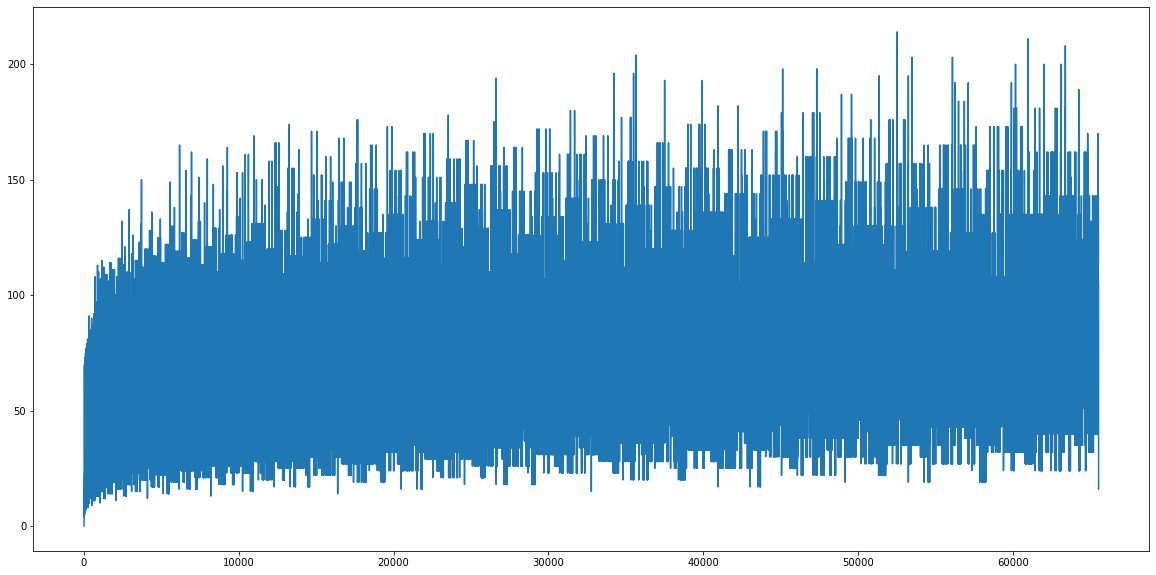

In [70]:
# https://oeis.org/A006877

plt.rcParams["figure.figsize"] = (20,10)
plot_generation_found()

In [71]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

In [72]:
factors(52527)

{1, 3, 17509, 52527}

In [73]:
factors(35655)

{1, 3, 5, 15, 2377, 7131, 11885, 35655}

In [74]:
factors(34239)

{1, 3, 101, 113, 303, 339, 11413, 34239}

In [75]:
factors(26623)

{1, 79, 337, 26623}

In [76]:
collatzTup(52527)

(214, 125, 3390923831403201924461844373087409266683795320230866482557889923)

In [77]:
collatzTup(35655)

(204, 119, 4353541293660829472910751203736945743146660067237324965246131)